In [6]:
ls /data/pbarpanda/spherical_SWE/initial_value_exps/Kelvin_wave//Hmean_200//H0_0/

spatial_data.hdf5


In [5]:
import numpy as np
import shtns
import pylab as py
import matplotlib
from tqdm import tqdm
import sys

sys.path.append('/data/pbarpanda/python_scripts/modules/')
import logruns as logruns
import save_and_load_hdf5_files as h5saveload
import eulerian_fluxes as eflux
import netcdf_utilities as ncutil
import os
os.environ["HDF5_USE_FILE_LOCKING"] = 'FALSE'
from tqdm import tqdm
import glob
from PIL import Image

import numpy as np
import shtns
import pylab as py
import matplotlib
from tqdm import tqdm
import sys
import time as ti

sys.path.append('/data/pbarpanda/python_scripts/modules/')
import logruns as logruns
import save_and_load_hdf5_files as h5saveload
import eulerian_fluxes as eflux
import netcdf_utilities as ncutil
from obspy.geodetics import kilometers2degrees
import momentum_advection_class as momentum_advect
from PIL import Image
import imageio
from IPython.display import Video

import matplotlib as mpl
from cycler import cycler

mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.edgecolor'] = 'black'
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['lines.color'] = 'black'


import os
os.environ["HDF5_USE_FILE_LOCKING"] = 'FALSE'  ### This is because NOAA PSL lab computers are somehow not able to use 

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", 
      [  "darkred", "darkorange", "pink", "white", "white","skyblue", "dodgerblue", "navy"][::-1])

def colorbar(fontsize=20):
    cbar = py.colorbar()
    for t in cbar.ax.get_yticklabels():
         t.set_fontsize(fontsize)
            
import warnings
warnings.filterwarnings('ignore')

import os
import glob

def remove_files(direc):
    files = glob.glob(direc, recursive=True)

    for f in files:
        try:
            os.remove(f)
        except OSError as e:
            print("Error: %s : %s" % (f, e.strerror))

In [7]:
def eddy(X):
    return X-X.mean(axis=-1)[...,None]


def eddy(X):
    return X-X.mean(axis=-1)[...,None]

def t_eddy(X):
    return X-X.mean(axis=0)[None,...]

def locate(Y, x, gap=0.1):
    index = np.where(np.abs(Y-x) < gap)[0][0]
    return index

def locate(Y, x, gap=None):
    if gap is None:
        gap = 0.5*np.abs(np.diff(Y))[0] 
    index = np.where(np.abs(Y-x) <= gap)[0][0]
    return index

In [9]:
##### This is to analyze experiments for H0 = 500
for H0 in tqdm([0]):
    for Hmean in [200]:
        source = '/data/pbarpanda/spherical_SWE/initial_value_exps/Kelvin_wave/Hmean_%d/H0_%d/'%(Hmean, H0)
        if os.path.exists(source):
            vars()['H0_%d_Hmean_%d'%(H0, Hmean)] = h5saveload.load_dict_from_hdf5(source+'spatial_data.hdf5')
        else:
            print ('H0_%d_Hmean_%d  does not exist yet'%(H0, Hmean))


100%|██████████| 1/1 [00:03<00:00,  3.03s/it]


In [10]:
dicti = vars()['H0_%d_Hmean_%d'%(H0, Hmean)]

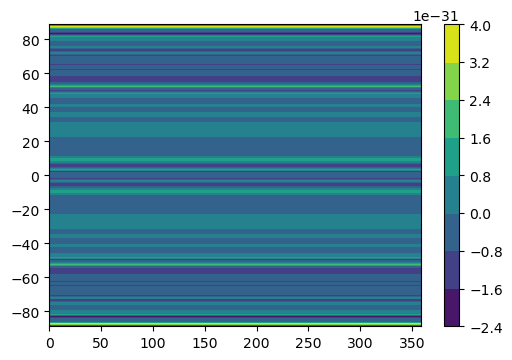

In [17]:
lon, lat = np.rad2deg(dicti['lons']), np.rad2deg(dicti['lats'])
py.contourf( lon, lat, eddy(dicti['U'][5,...]) ); py.colorbar()

In [18]:
dicti['U'].shape

(144, 128, 256)

In [28]:
print(str(3.1).zfill(5))

003.1


In [31]:
'1.2f'%1/(24*3600)

TypeError: not all arguments converted during string formatting